<a href="https://colab.research.google.com/github/Pria91/Machine-Learning-Projects-/blob/main/Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predictive Analysis 


Importing all relevant libraries
 


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Reading data from Raw File 

In [19]:
data = pd.read_csv("Raw Data.csv")

In [20]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Explore the Data

In [21]:
data.dtypes 

Hours     float64
Scores      int64
dtype: object

In [22]:
#Total number of rows and columns 
data.shape

(25, 2)

Statistical Details 

In [23]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Check for Null Values 

In [24]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Exploratory Data Analysis 

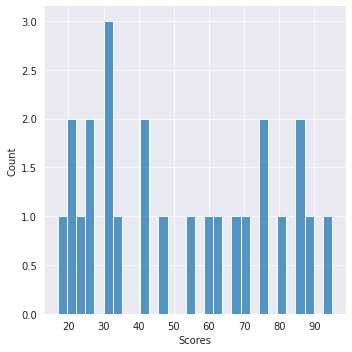

In [25]:
sns.set_style('darkgrid')
sns.displot(data['Scores'], kde = False, bins = 30)

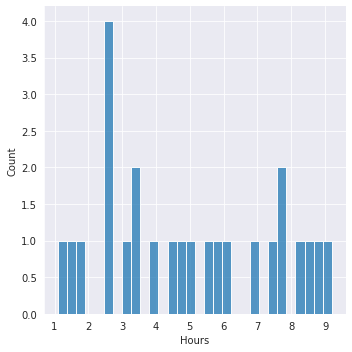

In [26]:
sns.set_style('darkgrid')
sns.displot(data['Hours'], kde = False, bins = 30)

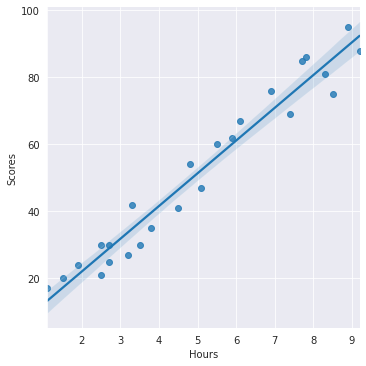

In [27]:
sns.lmplot(x='Hours', y='Scores', data = data)

Preparation of Model 

In [35]:
#Assigning the dependent and independent varaible 

x1 = data.iloc[:,:-1].values
y1 = data.iloc[:,1].values

X = x1.reshape(-1,1)
y = y1.reshape(-1,1)

In [36]:
#Dividing teh test and train values in 30:70 size respectively 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [37]:
#Creating and Training the model 
from sklearn.linear_model import LinearRegression


#Creating the model 
lm = LinearRegression()


#Training the model 
lm.fit(X_train, y_train)

print("Training Completed")



Training Completed


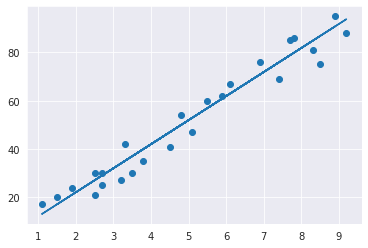

In [39]:
line = lm.coef_*X+lm.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

Prediction of Values

In [40]:
#Predicting Test Data

predictions = lm.predict(X_test)


#scores for the given study hours 
predictions 

array([[27.01878177],
       [78.84466226],
       [39.97525189],
       [75.85470762],
       [56.91832821],
       [49.94176737],
       [33.99534261],
       [86.81787465]])

Text(0, 0.5, 'PREDICTED Y')

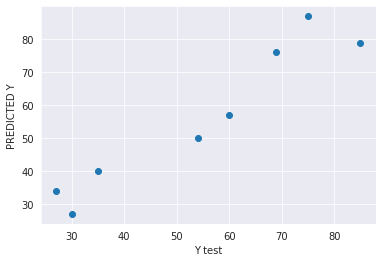

In [41]:
#Actual test value vs the predicted value 

plt.scatter(y_test, predictions)
plt.xlabel('Y test')
plt.ylabel('PREDICTED Y')

Evaluation of Model 

In [43]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))

print('Mean Square Error:', metrics.mean_squared_error(y_test,predictions))

print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Absolute Error: 5.864954643694258
Mean Square Error: 41.63486564552886
Root Mean Square Error: 6.452508476982333


In [44]:
#variance of model 

metrics.explained_variance_score(y_test,predictions)

0.9076652194870971

Final Answer 

In [46]:
#If the student studies 9.25 hours/day, then what will be the score ? 

hours = np.array(9.25)

hours = hours.reshape(-1,1)

answer = lm.predict(hours)

print("If the student studies 9.25 hours/day, then the score will be:", answer)

If the student studies 9.25 hours/day, then the score will be: [[94.29276126]]
